In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

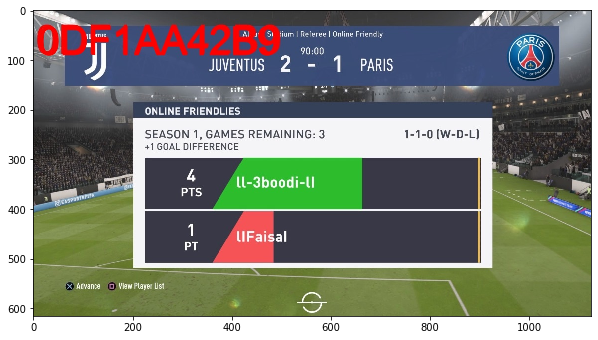

In [2]:
img = cv2.imread('images/screen_matches/0DF1AA42B9.jpg')
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

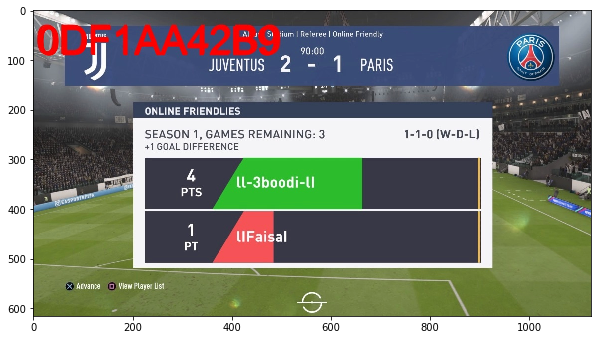

In [3]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB))

In [4]:
hsv.shape

(616, 1125, 3)

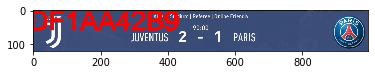

In [5]:
top = hsv[30:150,65:1060,:]
plt.imshow(cv2.cvtColor(top, cv2.COLOR_HSV2RGB))

In [6]:
#110, 120, 115

In [7]:
top[:,:,0].shape

(120, 995)

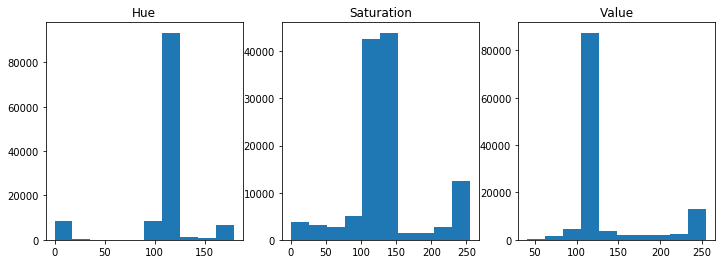

In [13]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.title('Hue')
plt.hist(top[:,:,0].ravel())
plt.subplot(1,3,2)
plt.title('Saturation')
plt.hist(top[:,:,1].ravel())
plt.subplot(1,3,3)
plt.title('Value')
plt.hist(top[:,:,2].ravel())
plt.show()

In [56]:
lower = np.array([100,100,100])
upper = np.array([125,150,125])

In [57]:
mask = cv2.inRange(hsv,lower, upper)

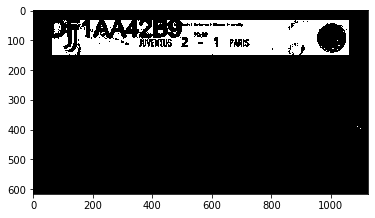

In [64]:
plt.imshow(mask,cmap='gray')

In [81]:
cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [82]:
len(cnts)

42

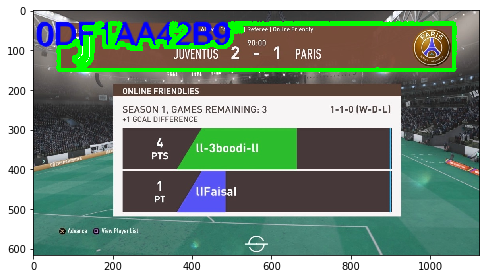

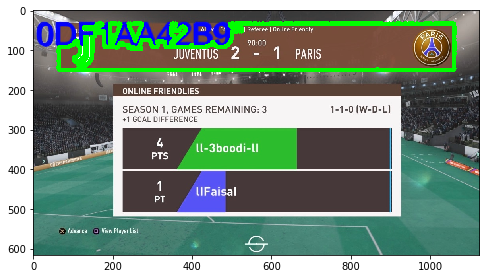

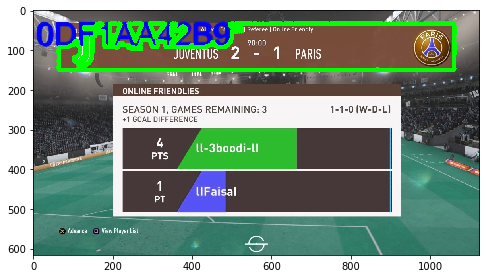

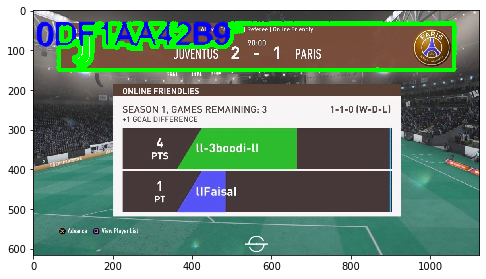

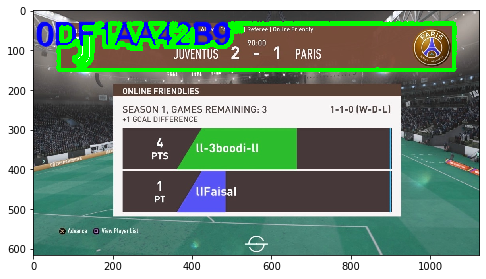

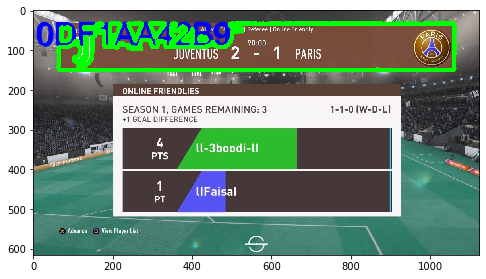

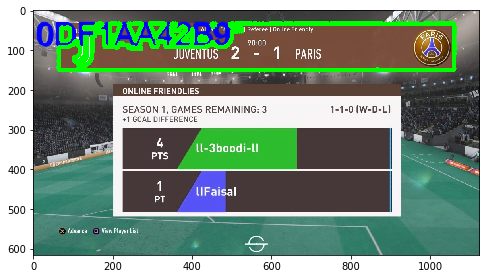

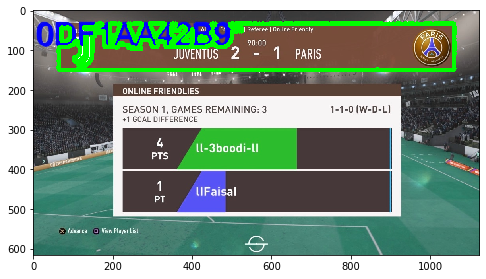

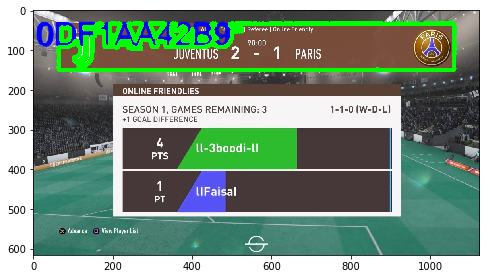

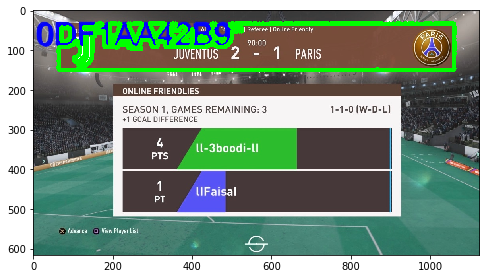

In [91]:
img_ed = img.copy()
for i in sorted(cnts, key = cv2.contourArea, reverse = True)[:10]:
    cv2.drawContours(img_ed,[i], 0, (0,255,0), 10)
    plt.figure(figsize=(8,6))
    plt.imshow(img_ed,cmap='gray')

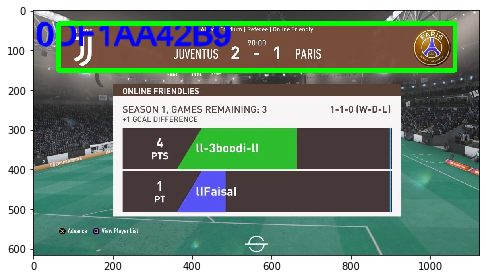

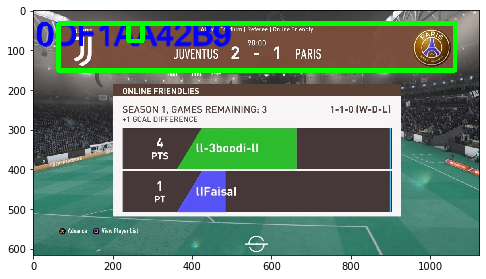

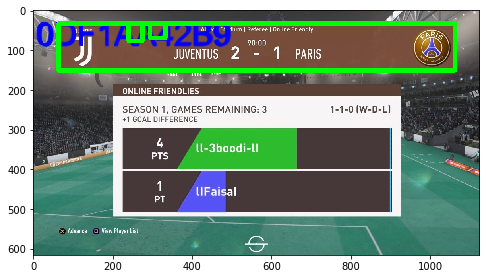

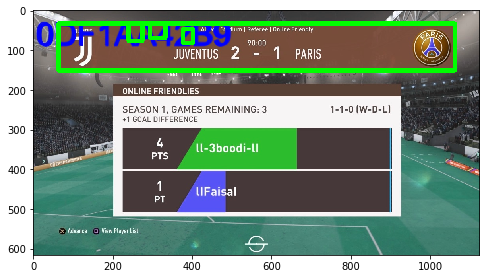

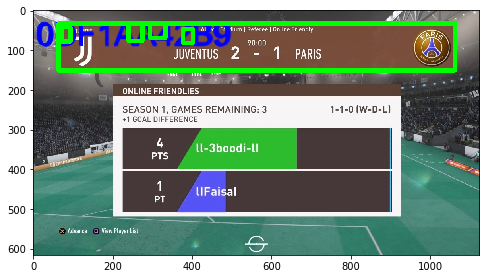

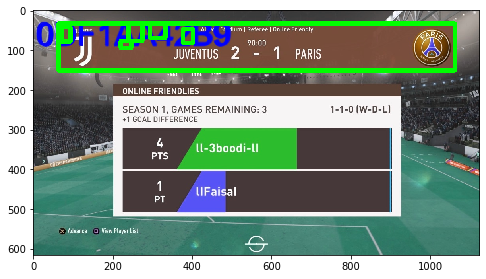

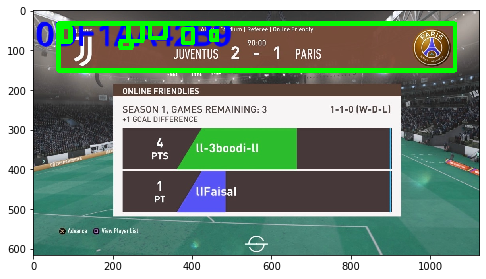

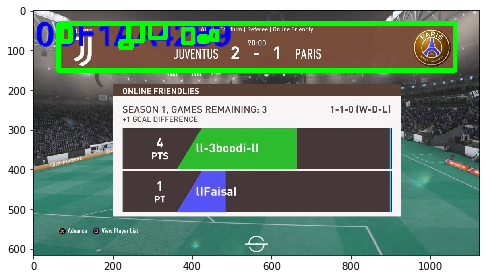

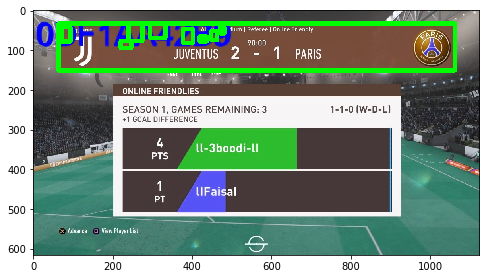

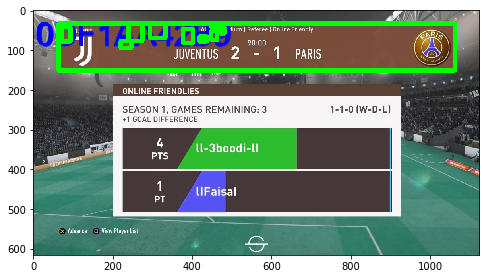

In [95]:
img_ed = img.copy()
cnts_rect = [cv2.boundingRect(c) for c in cnts]
for i in sorted(cnts_rect, key=lambda x: x[2]*x[3], reverse=True)[:10]:
    x,y,w,h=i
    cv2.rectangle(img_ed,(x,y),(x+w,y+h), (0,255,0), 10)
    plt.figure(figsize=(8,6))
    plt.imshow(img_ed,cmap='gray')


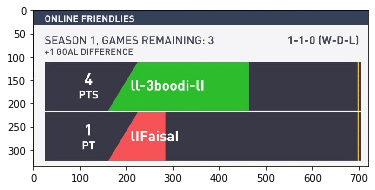

In [99]:
bottom = hsv[185:520,200:920,:]
plt.imshow(cv2.cvtColor(bottom, cv2.COLOR_HSV2RGB))

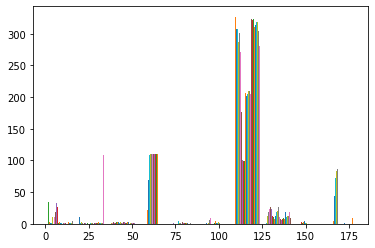

In [101]:
plt.hist(bottom[:,:,0])
plt.show()

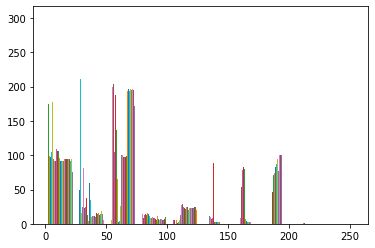

In [102]:
plt.hist(bottom[:,:,1])
plt.show()

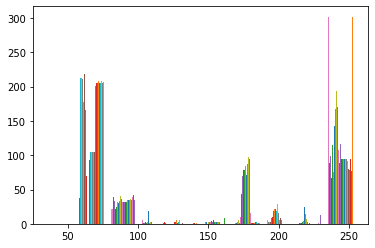

In [103]:
plt.hist(bottom[:,:,2])
plt.show()

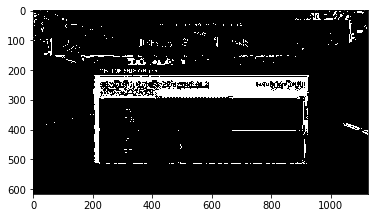

In [191]:
lower = np.array([110,0,130])
upper = np.array([125,250,250])
mask = cv2.inRange(hsv,lower, upper)
plt.imshow(mask,cmap='gray')

In [192]:
cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
len(cnts)

1029

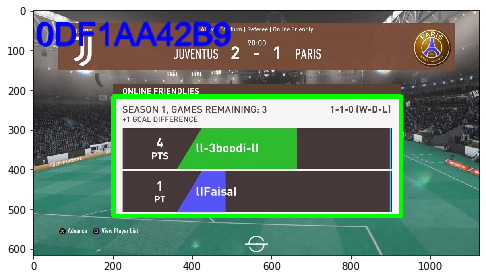

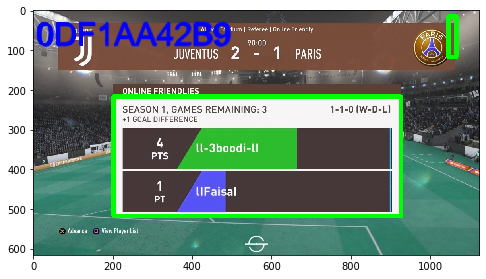

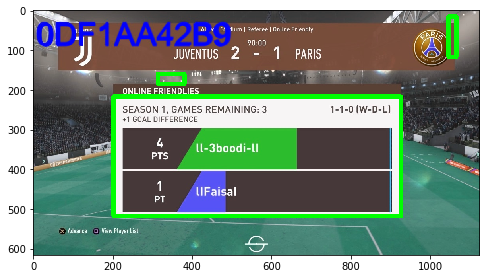

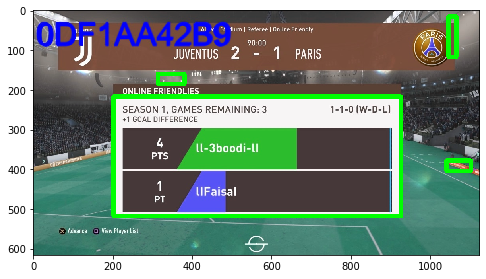

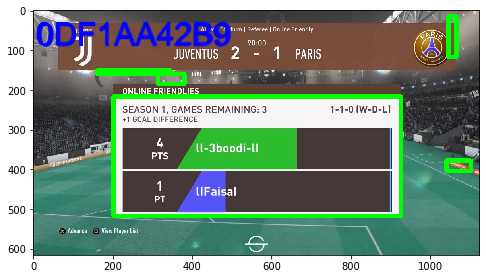

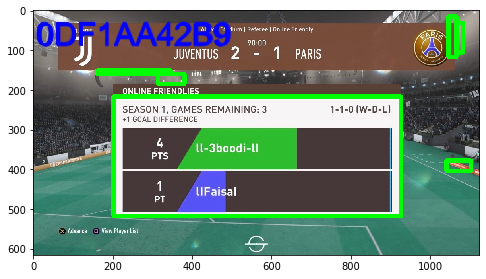

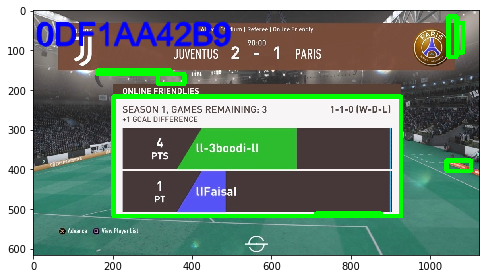

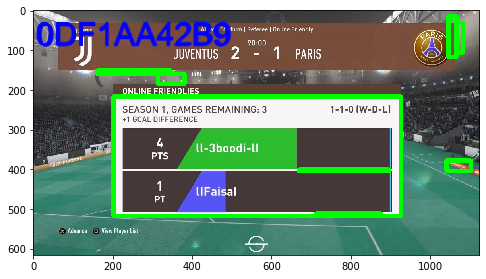

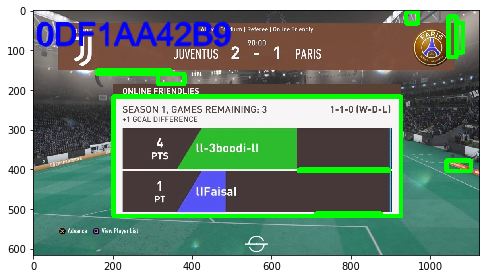

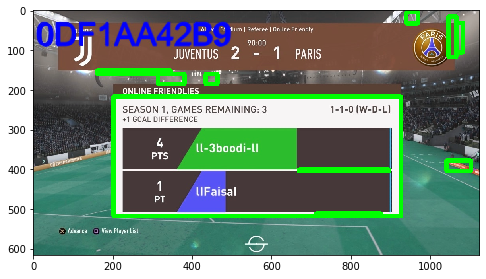

In [193]:
img_ed = img.copy()
cnts_rect = [cv2.boundingRect(c) for c in cnts]
for i in sorted(cnts_rect, key=lambda x: x[2]*x[3], reverse=True)[:10]:
    x,y,w,h=i
    cv2.rectangle(img_ed,(x,y),(x+w,y+h), (0,255,0), 10)
    plt.figure(figsize=(8,6))
    plt.imshow(img_ed,cmap='gray')